In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tue Jun  5 15:49:49 2018
DAE for Seismic  Denoising
@author: maihao
"""
'This is an atuoencoder denoising application'
__author__ = 'Mai Hao'

In [2]:
from keras.layers import Input, Convolution2D, MaxPooling2D, UpSampling2D  
from keras.models import Model  
from keras.datasets import mnist  
from tensorflow.contrib.learn.python.learn.datasets.mnist import read_data_sets
import numpy as np  
import matplotlib.pyplot as plt  
from keras.callbacks import TensorBoard  


Using TensorFlow backend.


In [3]:
import scipy.io as sio

DATA =  sio.loadmat( '/Users/maihao/Documents/MATLAB/Syn/mat/SynModel512/e.mat')
#DATA =  sio.loadmat('/Users/maihao/Documents/MATLAB/X1.mat')
ascent = DATA['e'].copy()
height, width = ascent.shape

x_train = ascent.copy()
x_test = ascent.copy()
x_train = np.reshape(x_train, (1, height, width, 1))  
x_test = np.reshape(x_test, (1, height, width, 1))  

x_train = np.clip(x_train, 0., 1.)  
x_test = np.clip(x_test, 0., 1.)  

noise_factor = 0.5  
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)   
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)   
x_train_noisy = np.clip(x_train_noisy, 0., 1.)  
x_test_noisy = np.clip(x_test_noisy, 0., 1.)  
print(x_train.shape)  
print(x_test.shape) 

(1, 512, 512, 1)
(1, 512, 512, 1)


In [4]:
#training setteings
input_img = Input(shape=(height, width, 1))  
  
x = Convolution2D(64, (3, 3), activation='relu', padding='same')(input_img)  
x = MaxPooling2D((2, 2), padding='same')(x)  
x = Convolution2D(64, (3, 3), activation='relu', padding='same')(x)  
encoded = MaxPooling2D((2, 2), padding='same')(x)  
  
x = Convolution2D(64, (3, 3), activation='relu', padding='same')(encoded)  
x = UpSampling2D((2, 2))(x)  
x = Convolution2D(64, (3, 3), activation='relu', padding='same')(x)  
x = UpSampling2D((2, 2))(x)  
decoded = Convolution2D(1, (3, 3), activation='sigmoid', padding='same')(x)  
  
autoencoder = Model(inputs=input_img, outputs=decoded)  
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')  

In [5]:
# 打开一个终端并启动TensorBoard，终端中输入 tensorboard --logdir=/autoencoder  
autoencoder.fit(x_train_noisy, x_train, epochs=30, batch_size=256,  
                shuffle=True, validation_data=(x_test_noisy, x_test),  
                callbacks=[TensorBoard(log_dir='autoencoder', write_graph=False)])  
  
decoded_imgs = autoencoder.predict(x_test_noisy)  

Train on 1 samples, validate on 1 samples
Epoch 1/30
1/1 [==============================] - 3s 3s/step - loss: 0.7130 - val_loss: 0.6241
Epoch 2/30
1/1 [==============================] - 3s 3s/step - loss: 0.6240 - val_loss: 0.5105
Epoch 3/30
1/1 [==============================] - 3s 3s/step - loss: 0.5101 - val_loss: 0.3481
Epoch 4/30
1/1 [==============================] - 3s 3s/step - loss: 0.3476 - val_loss: 0.2994
Epoch 5/30
1/1 [==============================] - 2s 2s/step - loss: 0.2991 - val_loss: 0.2916
Epoch 6/30
1/1 [==============================] - 2s 2s/step - loss: 0.2911 - val_loss: 0.2825
Epoch 7/30
1/1 [==============================] - 2s 2s/step - loss: 0.2819 - val_loss: 0.2753
Epoch 8/30
1/1 [==============================] - 3s 3s/step - loss: 0.2746 - val_loss: 0.2671
Epoch 9/30
1/1 [==============================] - 3s 3s/step - loss: 0.2663 - val_loss: 0.2597
Epoch 10/30
1/1 [==============================] - 2s 2s/step - loss: 0.2588 - val_loss: 0.2517
Epoch 1

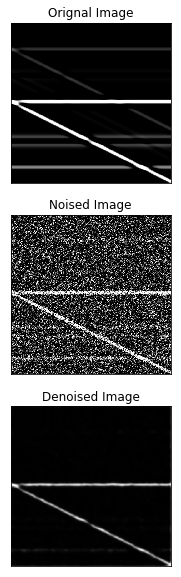

In [10]:
  
n = 1  
plt.figure(figsize=(50, 10)) 

for i in range(n):  
    ax = plt.subplot(3, n, i + 1)  
    plt.title('Orignal Image')
    plt.imshow(x_test[i].reshape(height, width))  
    plt.gray()  
    ax.get_xaxis().set_visible(False)  
    ax.get_yaxis().set_visible(False)  
      
    ax = plt.subplot(3, n, i + 1 + n)
    plt.title('Noised Image')
    plt.imshow(x_test_noisy[i].reshape(height, width))  
    plt.gray()  
    ax.get_xaxis().set_visible(False)  
    ax.get_yaxis().set_visible(False)  
  
    ax = plt.subplot(3, n, i + 1 + 2*n) 
    plt.title('Denoised Image')
    plt.imshow(decoded_imgs[i].reshape(height, width))  
    plt.gray()  
    ax.get_xaxis().set_visible(False)  
    ax.get_yaxis().set_visible(False)  
plt.show()  

**The results figure dpi is bad .  png format is shown in the filefolder.**